In [3]:
import sys
sys.executable

'C:\\Users\\HP\\.virtualenvs\\data-science-kLkPvyWw\\Scripts\\python.exe'

# Exploring One - Dimensional Data

In [5]:
from typing import List, Dict, Callable
from collections import Counter
import math
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def bucketize(point: float, bucket_size: float) -> float:
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

In [9]:
def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """buckets the points and counts how many in each buckets"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width = bucket_size)
    plt.title(title)
    # plt.axis('off')
    plt.show()


In [11]:
import random
import statistics

Normal = statistics.NormalDist()

In [13]:
random.seed(0)
uniform = [200 * random.random() - 100 for _ in range(10000)]
normal = [57 * Normal.inv_cdf(random.random()) for _ in range(10000)]

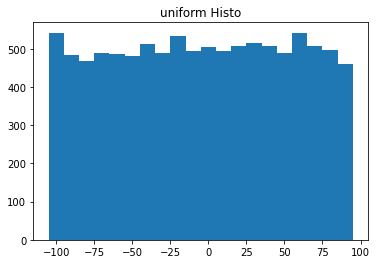

In [15]:
plot_histogram(uniform, 10, "uniform Histo")

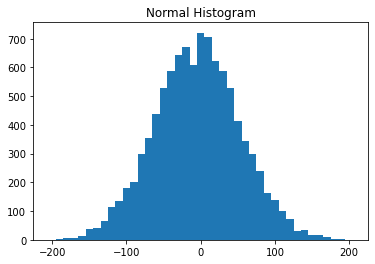

In [17]:
plot_histogram(normal, 10, "Normal Histogram")

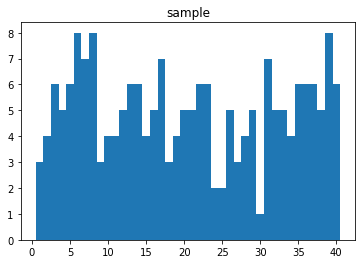

In [19]:

random.seed(0)
points = [random.randint(1,40) for _ in range(200)]
plot_histogram(points=points, bucket_size=1, title='sample')

# Two Dimensions

In [21]:
def random_normal() -> float:
    '''returns a random draw from a standard normal distribution'''
    return Normal.inv_cdf(random.random())

In [23]:
xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

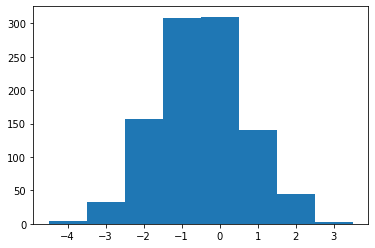

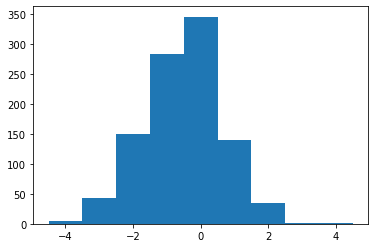

In [25]:
plot_histogram(points=ys1, bucket_size=1)
plot_histogram(points=ys2, bucket_size=1)

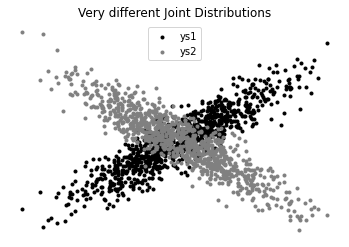

In [27]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very different Joint Distributions")
plt.axis('off')
plt.show()

In [29]:
print('Correlation between xs and ys1')
print(np.cov(xs, ys1))
print()
print('Correlation between xs and ys2')
print(np.cov(xs, ys2))

Correlation between xs and ys1
[[1.04817382 1.0560328 ]
 [1.0560328  1.31543654]]

Correlation between xs and ys2
[[ 1.04817382 -1.05855838]
 [-1.05855838  1.31916463]]


# Many dimentions

In [31]:
Vector = List[float]
Matrix = List[List[float]]
def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    return [[entry_fn(i, j)
            for j in range(num_cols)]
            for i in range(num_rows)]

In [33]:
from stati import correlation

In [35]:
def correlation_matrix(data: List[Vector]) -> Matrix:
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])
    return make_matrix(len(data), len(data), correlation_ij)

In [36]:
vectors = [xs, ys1, ys2]
num_vectors = len(vectors)
correlation_matrix(vectors)

[[0.9999999999999998, 0.899343920198157, -0.9002200065198326],
 [0.899343920198157, 1.0, -0.8118928394361864],
 [-0.9002200065198326, -0.8118928394361864, 1.0]]

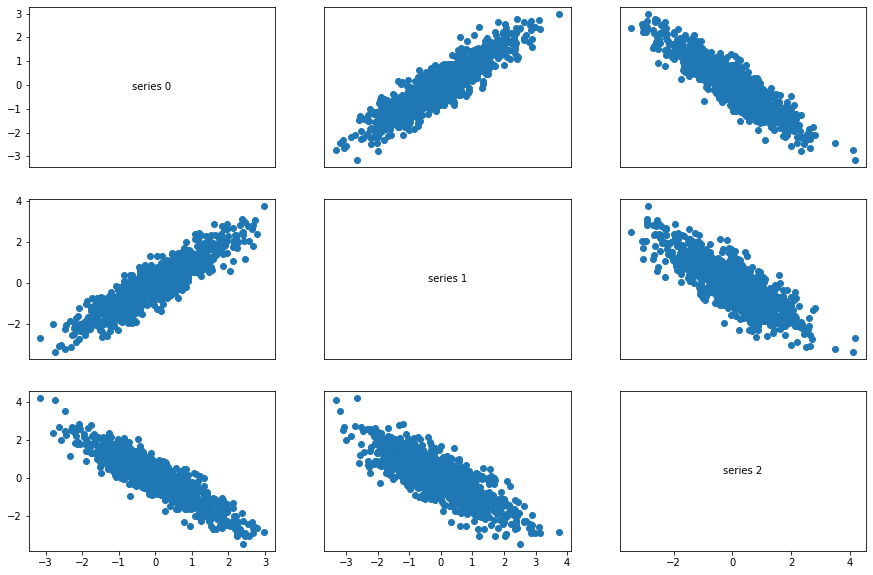

In [47]:
fig, ax = plt.subplots(num_vectors, num_vectors)
fig.set_size_inches(15,10)
for i in range(num_vectors):
    for j in range(num_vectors):
        if i != j: ax[i][j].scatter(vectors[j], vectors[i])
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                        xycoords="axes fraction",
                        ha="center",
                        va="center")
        if i <num_vectors -1:
            ax[i][j].xaxis.set_visible(False)
        if j > 0: 
            ax[i][j].yaxis.set_visible(False)
            ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
            ax[0][0].set_ylim(ax[0][1].get_ylim())
    

# Using Named Tuples

In [80]:
import datetime

stock_prince = {'closing_price': 102.05,
                'date': datetime.date(2014,8,29),
                'symbol': 'AAPL'}

In [81]:
stock_prince['closing_price']

102.05

In [82]:
price: Dict[datetime.date, float] = {}

In [83]:
from collections import namedtuple

In [84]:
StockPrice = namedtuple('StockPrice', ['symbol', 'date','closing_price'])
pricing = StockPrice('MSFT', datetime.date(2018, 12, 14), 105.02)

In [87]:
from typing import NamedTuple

class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        '''its a class, so we can add methods too'''
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL'] 

In [91]:
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 103.2)

In [92]:
print(price.symbol)
print(price.date)
print(price.closing_price)
print(price.is_high_tech())

MSFT
2018-12-14
103.2
True


# Dataclasses

In [95]:
from dataclasses import dataclass

In [96]:
@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        '''its a class, so we can add methods too'''
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

In [97]:
price2 = StockPrice2("MSFT", datetime.date(2018, 12, 14), 106.6)

In [108]:
assert price2.symbol == "MSFT"
assert price2.is_high_tech()
assert price2.closing_price

# Cleaning and Munging

In [111]:
from dateutil.parser import parse

In [115]:
def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(
                    symbol=symbol,
                    date=parse(date).date(),
                    closing_price=float(closing_price))

In [124]:
stock = parse_row(["MSFT", "2018-12-14", "106.03"])
stock

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)

In [129]:
assert stock.symbol == "MSFT"
assert stock.date == datetime.date(2018, 12, 14)
assert stock.closing_price == 106.03